In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

### Read in the Data

In [2]:
churn = pd.read_csv('data/churn.csv')
churn_train = pd.read_csv('data/churn_train.csv')
churn_test = pd.read_csv('data/churn_test.csv')
churn_train.head(20)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0
5,14.51,5.0,NaN,1.00,Astapor,2014-04-22,iPhone,2014-01-29,0.0,0,True,100.0
6,4.87,4.7,4.0,1.00,Astapor,2014-04-21,Android,2014-01-18,0.0,0,False,66.7
7,1.78,4.0,5.0,1.00,Winterfell,2014-01-12,iPhone,2014-01-11,0.0,3,False,0.0
8,6.87,5.0,4.7,1.00,Astapor,2014-01-30,Android,2014-01-01,0.0,3,False,66.7
9,2.41,5.0,3.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,1,False,100.0


### Look at NaN values

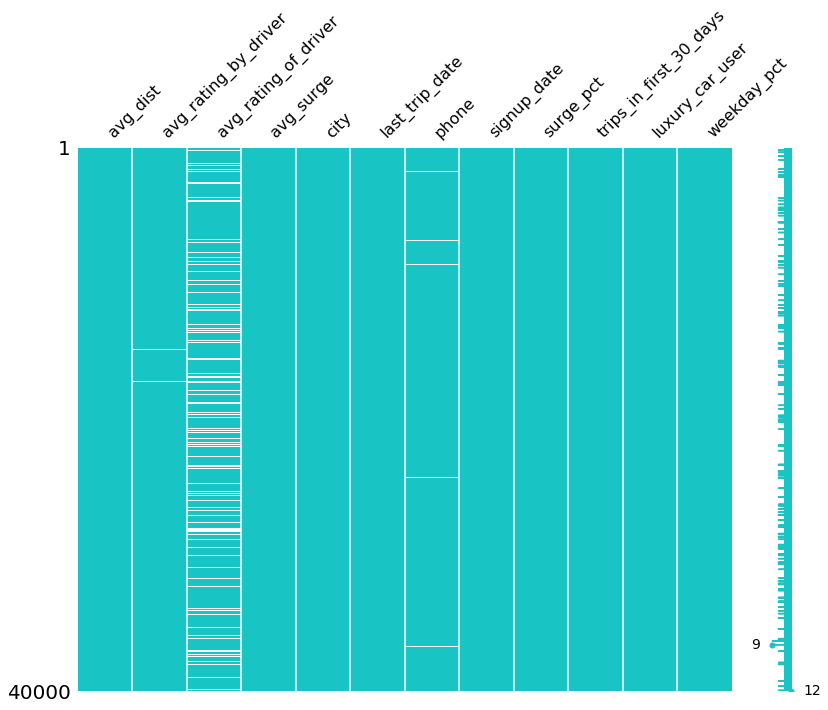

In [3]:
msno.matrix(churn_train, figsize=(13,10), color=(0.10, .77, .77))

### Percent missing from avg rating of driver

In [4]:
churn_train['avg_rating_of_driver'].isnull().sum()/len(churn_train)

0.1632

### Change object columns to int 

In [5]:
churn_train = pd.get_dummies(churn_train, columns=['city', 'phone'])
churn_test = pd.get_dummies(churn_test, columns=['city', 'phone'])

In [6]:
#Convert last_trip_date and signup_date to datetime object
churn['last_trip_date'] = pd.to_datetime(churn['last_trip_date'])
churn_train['signup_date'] = pd.to_datetime(churn_train['signup_date'])
churn_test['signup_date'] = pd.to_datetime(churn_test['signup_date'])

In [7]:
#Convert last_trip_date column to int
churn_train['last_trip_date'] = churn_train['last_trip_date'] >= '2014-06-01'
churn_train['last_trip_date'] = churn_train['last_trip_date'].astype(int)
churn_train['luxury_car_user'] = churn_train['luxury_car_user'].astype(int)

#For test set
churn_test['last_trip_date'] = churn_test['last_trip_date'] >= '2014-06-01'
churn_test['last_trip_date'] = churn_test['last_trip_date'].astype(int)
churn_test.drop(columns=['signup_date'], inplace=True)

In [8]:
churn_train['last_trip_date'].unique()
churn_train.drop(columns=['signup_date'], inplace=True)
churn_train.rename(columns={'last_trip_date': 'target'}, inplace=True)
churn_test.rename(columns={'last_trip_date': 'target'}, inplace=True)

In [9]:
imputer = SimpleImputer()
churn_train = pd.DataFrame(imputer.fit_transform(churn_train), columns=churn_train.columns)
churn_test = pd.DataFrame(imputer.fit_transform(churn_test), columns=churn_train.columns)

### Split dataframe

In [10]:
X_train = churn_train.drop(columns=['target'])
y_train = churn_train['target']
X_test = churn_test.drop(columns=['target'])
y_test = churn_test['target']

In [14]:
churn_test.info

<bound method DataFrame.info of       avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  target  \
0         2.48                   5.0              5.000000       1.00     0.0   
1        10.81                   5.0              5.000000       1.00     0.0   
2        12.95                   5.0              5.000000       1.00     0.0   
3         3.92                   5.0              4.601011       1.00     0.0   
4         1.46                   5.0              4.500000       1.00     0.0   
...        ...                   ...                   ...        ...     ...   
9995      2.11                   5.0              5.000000       1.00     0.0   
9996      5.49                   4.9              4.100000       1.00     0.0   
9997      2.49                   4.2              4.600000       1.25     0.0   
9998      1.05                   4.0              5.000000       1.00     0.0   
9999      6.31                   5.0              5.000000       1.00     0.0

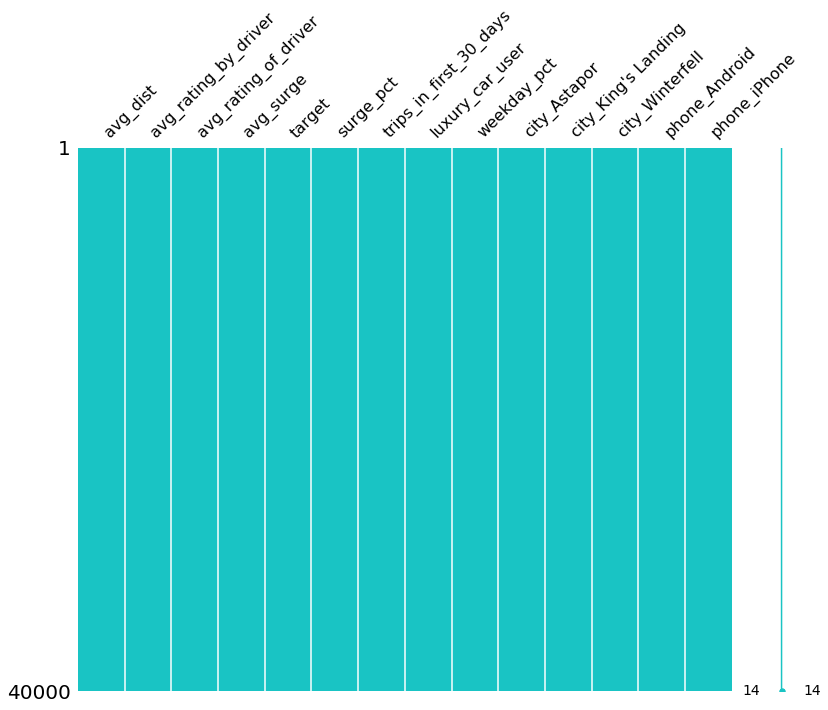

In [12]:
msno.matrix(churn_train, figsize=(13,10), color=(0.10, .77, .77))